In [5]:
from sklearn.ensemble import GradientBoostingClassifier as GBC
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.linear_model import LogisticRegression as LR
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys

In [79]:
 #importing the processed dataset
file_name="corpus.csv"
data = pd.read_csv(file_name)

sample_size = 10000

print("Taking first", sample_size, "rows from dataset..")

# split into train test
print("Class counts:")
print(pd.DataFrame(data['is_cardiologist'][:sample_size].value_counts()))
y = data['is_cardiologist'].values[:sample_size]
X_train, X_test, y_train, y_test = train_test_split(data.corpus[:sample_size], y,test_size=0.25, random_state=0)
# # split into train test
# print("Class counts:")
# print(pd.DataFrame(data['is_cardiologist'].value_counts()))
# y = data['is_cardiologist'].values
# X_train, X_test, y_train, y_test = train_test_split(data.corpus, y,test_size=0.25, random_state=0)


# Bag of words model
print ("TFIDF vectorizer..." )

from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer(max_features = 1000, stop_words= "english")
print(cv)

X_train_cv = cv.fit_transform(X_train).toarray()
X_test_cv = cv.transform(X_test).toarray()


Taking first 10000 rows from dataset..
Class counts:
       is_cardiologist
False             5128
True              4872
TFIDF vectorizer...
TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=1000, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)


In [80]:
cv

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=1000, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [81]:
X_train_cv

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [83]:
#cv.idf_

# Top n features based upont idf

In [84]:
indices = np.argsort(cv.idf_)[::-1]
features = cv.get_feature_names()
top_n = 10
top_features = [features[i] for i in indices[:top_n]]
print(top_features)

['cessation', 'occupational', 'portable', 'portion', 'opiates', 'cocaine', 'collagenase', 'operating', 'opening', 'collar']


In [85]:
# Random Forest Feture importances 

In [86]:
rf = RF()
rf.fit(X_train_cv, y_train)
print ("Features sorted by their score:")

Features sorted by their score:


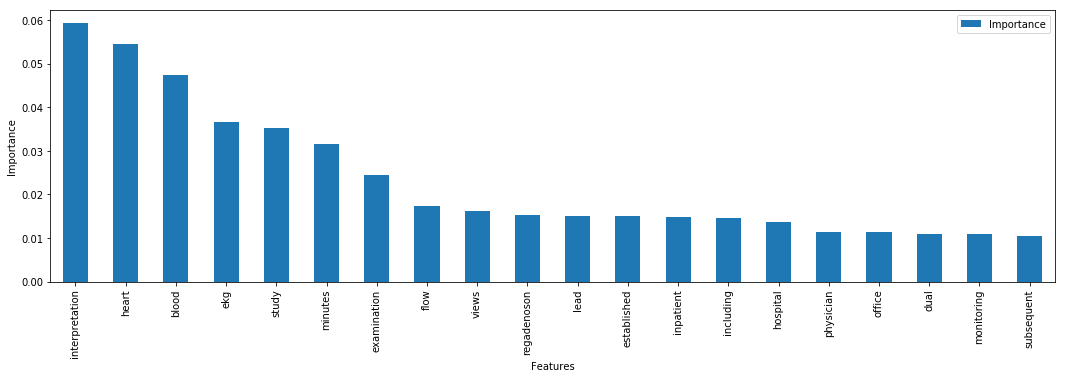

In [87]:
fi = pd.DataFrame(sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), features), reverse=True),columns=['Importance', 'Feature'] )

# plot chart
ax = fi.head(20).plot.bar(x='Feature', y='Importance', figsize=(18, 5))
ax.set_xlabel("Features")
ax.set_ylabel("Importance")
plt.show()

In [88]:
fi.head(20)

,Importance,Feature
0,0.0593,interpretation
1,0.0544,heart
2,0.0474,blood
3,0.0367,ekg
4,0.0352,study
5,0.0316,minutes
6,0.0245,examination
7,0.0174,flow
8,0.0162,views
9,0.0152,regadenoson


In [3]:
import os 
import requests

os.environ['NO_PROXY'] = 'localhost'

# 
url = "http://localhost:5000"
test_url = f"{url}/test"
pred_url = f"{url}/predict"

# print GET results
print(requests.get(test_url).json()['message'])

ConnectionError: HTTPConnectionPool(host='localhost', port=5000): Max retries exceeded with url: /test (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x000001D21CFF98D0>: Failed to establish a new connection: [WinError 10061] No connection could be made because the target machine actively refused it',))